In [26]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
Glass=pd.read_csv("glass.csv")

In [16]:
Glass

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


In [17]:
x = Glass.iloc[:,0:10]
y = Glass.iloc[:,-1]

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [19]:
clf = LogisticRegression(random_state=0,multi_class='multinomial',solver='newton-cg')
model = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [20]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix) #.... are incorrect predictions

[[ 9  0  0  0  0  0]
 [ 0 17  2  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


1.building_windows_float_processed 
2.building_windows_non_float_processed
3.vehicle_windows_float_processed
4.vehicle_windows_non_float_processed (none in this database)
5.containers 
6.tableware
7.headlamps

In [21]:
#create new observations
new_observation = [1.5159,13.02,3.58,1.51,73.12,0.69,7.96,0,0,0]
#predict class
y_pred = model.predict([new_observation])
#view predicted probabilities
probability = model.predict_proba([new_observation])

In [22]:
if y_pred == 1:
    lbl1 = 'building windows'
else:
    if y_pred == 2:
        lbl1 = 'building_windows_non_float_processed'
    else:
        if y_pred == 3:
            lbl1 = 'vehicle_windows_float_processed'
        else:
            if y_pred ==4:
                lbl1 = 'vehicle_windows_non_float_processed'
            else:
                if y_pred == 5:
                    lbl1 = 'containers'
                else:
                    if y_pred == 6:
                        lbl1 = 'tableware'
                    else:
                        if y_pred == 7:
                            lbl1 = 'headlamps'
                

In [23]:
print('Predict the glass type :',lbl1)
print('Predicted probability of the glass type is :', probability)

Predict the glass type : building windows
Predicted probability of the glass type is : [[9.99999851e-001 1.49026081e-007 5.24947659e-070 2.78946492e-054
  2.17524181e-118 1.35168633e-144]]


Glass values correlation


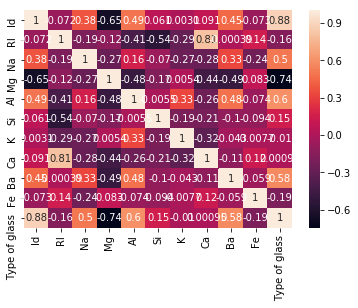

In [24]:
import seaborn as sns
corr = Glass.corr()
print('Glass values correlation')
sns.heatmap(corr, annot = True)

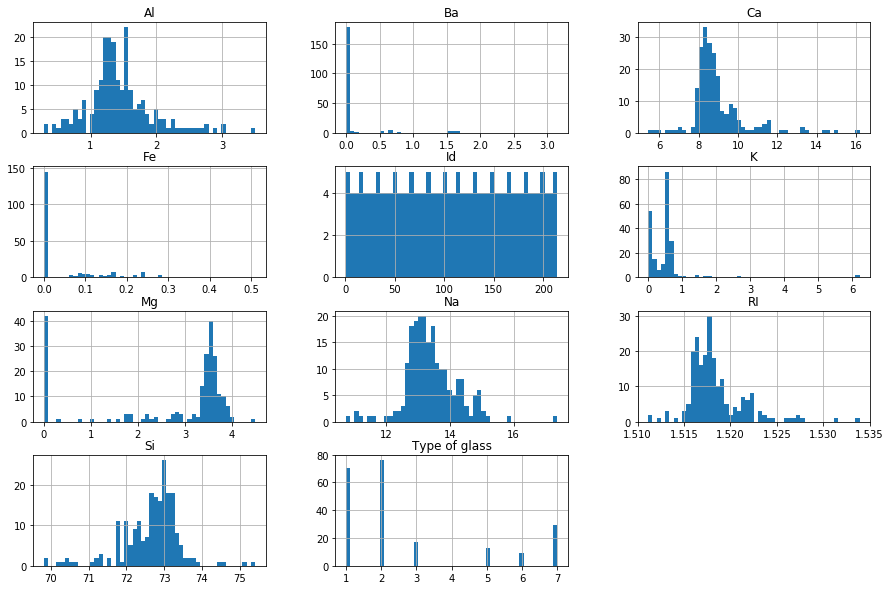

In [25]:
Glass.hist(bins=50, figsize=(15,10))
plt.show()